In [63]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import xarray as xr

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [64]:
aq_data = xr.open_dataset("processed_data/delhi_cpcb_2022_cleaned.nc")
aq_df = aq_data.to_dataframe().reset_index().set_index("time", drop=False)
aq_df["hour"] = aq_df["time"].dt.hour
aq_df.head()

station                time  \
time                                                            
2022-01-01 00:30:00  Alipur, Delhi - DPCC 2022-01-01 00:30:00   
2022-01-01 01:30:00  Alipur, Delhi - DPCC 2022-01-01 01:30:00   
2022-01-01 02:30:00  Alipur, Delhi - DPCC 2022-01-01 02:30:00   
2022-01-01 03:30:00  Alipur, Delhi - DPCC 2022-01-01 03:30:00   
2022-01-01 04:30:00  Alipur, Delhi - DPCC 2022-01-01 04:30:00   

                              From Date             To Date   PM2.5    PM10  \
time                                                                          
2022-01-01 00:30:00 2022-01-01 00:00:00 2022-01-01 01:00:00  219.50  342.75   
2022-01-01 01:30:00 2022-01-01 01:00:00 2022-01-01 02:00:00  224.50  360.25   
2022-01-01 02:30:00 2022-01-01 02:00:00 2022-01-01 03:00:00  217.00  359.00   
2022-01-01 03:30:00 2022-01-01 03:00:00 2022-01-01 04:00:00  214.25  341.50   
2022-01-01 04:30:00 2022-01-01 04:00:00 2022-01-01 05:00:00  207.50  309.67   

                        NO    NO2     NOx   NH3  ...  WS      WD    SR  \
time                                             ...                     
2022-01-01 00:30:00  94.73  53.95  105.95  3.78  ... NaN  205.95  4.60   
2022-01-01 01:30:00  89.30  44.70   96.60  5.50  ... NaN  206.05  4.60   
2022-01-01 02:30:00  50.08  48.20   66.45  4.30  ... NaN  205.38  4.62   
2022-01-01 03:30:00  25.18  42.80   43.30  3.70  ... NaN  206.50  4.62   
2022-01-01 04:30:00  24.17  44.75   43.50  3.38  ... NaN  211.95  4.65   

                         BP    AT   RF  TOT-RF   latitude  longitude  hour  
time                                                                        
2022-01-01 00:30:00  999.10  6.85  0.0     0.0  28.815329   77.15301     0  
2022-01-01 01:30:00  998.90  6.72  0.0     0.0  28.815329   77.15301     1  
2022-01-01 02:30:00  998.70  6.97  0.0     0.0  28.815329   77.15301     2  
2022-01-01 03:30:00  998.42  6.72  0.0     0.0  28.815329   77.15301     3  
2022-01-01 04:30:00  998.15  6.60  0.0     0.0  28.815329   77.15301     4  

[5 rows x 26 columns]

In [65]:
all_stations = aq_df["station"].unique()
all_time = aq_df["time"].unique()

In [66]:
print(all_stations.reshape(13, -1))

[['Alipur, Delhi - DPCC' 'Anand Vihar, Delhi - DPCC'
  'Ashok Vihar, Delhi - DPCC']
 ['Aya Nagar, Delhi - IMD' 'Bawana, Delhi - DPCC'
  'Burari Crossing, Delhi - IMD']
 ['CRRI Mathura Road, Delhi - IMD' 'Chandni Chowk, Delhi - IITM'
  'DTU, Delhi - CPCB']
 ['Dr. Karni Singh Shooting Range, Delhi - DPCC'
  'Dwarka-Sector 8, Delhi - DPCC ' 'IGI Airport (T3), Delhi - IMD']
 ['IHBAS, Dilshad Garden, Delhi - CPCB' 'ITO, Delhi - CPCB'
  'Jahangirpuri, Delhi - DPCC']
 ['Jawaharlal Nehru Stadium, Delhi - DPCC' 'Lodhi Road, Delhi - IITM'
  'Lodhi Road, Delhi - IMD']
 ['Major Dhyan Chand National Stadium, Delhi - DPCC'
  'Mandir Marg, Delhi - DPCC' 'Mundka, Delhi - DPCC']
 ['NSIT Dwarka, Delhi - CPCB' 'Najafgarh, Delhi - DPCC'
  'Narela, Delhi - DPCC']
 ['Nehru Nagar, Delhi - DPCC' 'North Campus, DU, Delhi - IMD'
  'Okhla Phase-2, Delhi - DPCC']
 ['Patparganj, Delhi - DPCC' 'Punjabi Bagh, Delhi - DPCC'
  'Pusa, Delhi - DPCC']
 ['Pusa, Delhi - IMD' 'R K Puram, Delhi - DPCC' 'Rohini, Delhi - DPCC'

## Static station plot

In [67]:
station_df = aq_df.drop_duplicates(subset=["station"])

folium_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

for index, row in station_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        popup=row["station"],
        fill=True,
        color="crimson",
    ).add_to(folium_map)
    
folium_map

## Animation over time

In [68]:
focus_df = aq_df["2022-11"]
focus_df["time"] = focus_df["time"].dt.strftime("%Y-%m-%d %H:%M:%S")
focus_df.fillna(0, inplace=True)
print(focus_df.shape)
px.scatter(focus_df, x="latitude", y="longitude", animation_frame="time", animation_group="station", size="PM2.5", color="PM2.5")

/tmp/ipykernel_1230639/2328123771.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



(28080, 26)


## Timeseries plot

In [103]:
fig = go.Figure()

# Add a scatter trace for the time series
focus_df = aq_df["2022-10-01":"2022-10-15"]
for station in ["Pusa, Delhi - IMD", "Shadipur, Delhi - CPCB"]:#aq_df.station.unique():
    tmp_df = focus_df[focus_df.station == station]
    series = tmp_df["PM2.5"].rolling(window=3).mean().values
    print(series)
    fig.add_trace(go.Scatter(
        x=np.array(list(range(series.shape[0]))),
        y=series,
        mode='lines+markers',
        name=station,
    ))

# Set the layout with a rangeslider
# fig.update_layout(
#     title='Long Time Series with Scrollbar',
#     xaxis=dict(
#         title='Time',
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1, label='1d', step='hour', stepmode='backward'),
#                 # dict(count=7, label='1w', step='day', stepmode='backward'),
#                 # dict(count=1, label='1m', step='month', stepmode='backward'),
#                 # dict(count=6, label='6m', step='month', stepmode='backward'),
#                 # dict(count=1, label='1y', step='year', stepmode='backward'),
#                 dict(step='all')
#             ])
#         ),
#         rangeslider=dict(visible=True),
#         type='date'
#     ),
#     yaxis=dict(title='Value'),
# )

# save the figure
fig.show()

[         nan          nan  82.97666667  79.06        73.57666667
  73.5         80.96        86.07666667  89.          85.58
  84.89        89.28333333  91.2         85.43666667  71.98333333
  60.98666667  52.99333333  49.99333333  49.41        47.18666667
  43.98333333  49.63333333  61.01666667  77.52666667  74.90666667
  71.22        60.61        64.27        70.97        77.92
  75.18        69.66333333  70.66333333  77.81666667  86.42
  89.38        79.44333333  65.25333333  50.83666667  47.60666667
  45.28        40.7         36.24666667  35.03        40.14333333
  44.41        39.36        28.43333333  21.59333333  27.82666667
  35.13        36.79666667  31.41        27.89        27.74666667
  36.24666667  46.03666667  58.64333333  60.68666667  57.75666667
  52.84666667  50.06666667  48.85        43.20666667  35.56
  32.51666667  28.10333333  25.94        15.26333333  12.28
   9.09666667  16.29666667  17.90666667          nan          nan
          nan          nan          nan 

/tmp/ipykernel_1230639/1985028568.py:4: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



## Check peak timings

In [95]:
station = all_stations[7]
print(station)
focus_df = aq_df[aq_df.station == station]

max_hours = []
days = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
for day in tqdm(days):
    tmp_df = focus_df[focus_df.time.dt.date == day.date()]
    max_hour = tmp_df.time.dt.hour[tmp_df["PM2.5"].argmax()]
    if tmp_df["PM2.5"].isna().sum() == 24:
        max_hours.append(np.nan)
    else:
        max_hours.append(max_hour)

Chandni Chowk, Delhi - IITM


100%|██████████| 365/365 [00:01<00:00, 316.55it/s]


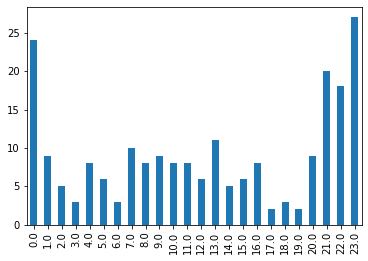

In [96]:
pd.Series(max_hours).value_counts().sort_index().plot(kind="bar");

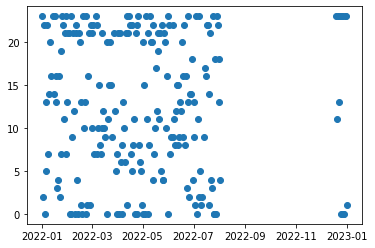

In [97]:
plt.plot(days, max_hours, "o");

## Lagged correlations